https://www.kaggle.com/c/bike-sharing-demand/overview

In [1]:
import os

import datetime as dt

import pandas as pd
import numpy as np

import seaborn as sns


In [2]:
df = pd.read_csv('/Users/reejungkim/Documents/Git/Bike sharing/bike-sharing-demand/train.csv')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# EDA

In [9]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


## Feature engineering

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [12]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
#df['minute'] = df['datetime'].dt.minute
#df['second'] = df['datetime'].dt.second

In [13]:
#day of week. Sun -> 0 
df['dayofweek'] = df['datetime'].dt.dayofweek

In [14]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [25]:
index2day = "Sun Mon Tue Wed Thu Fri Sat".split()
index2day

['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

In [26]:
pvt = df.pivot_table(index='dayofweek', columns='season', values='count', aggfunc=np.sum)
pvt.index = index2day

pvt

season,1,2,3,4
Sun,39828,77949,94070,83449
Mon,41122,84896,87606,78361
Tue,46574,77646,94214,73792
Wed,51448,86595,89902,78456
Thu,48061,83630,91223,79590
Fri,46983,89295,92789,82451
Sat,38482,88271,90858,67935


In [36]:
df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

/Users/reejungkim/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


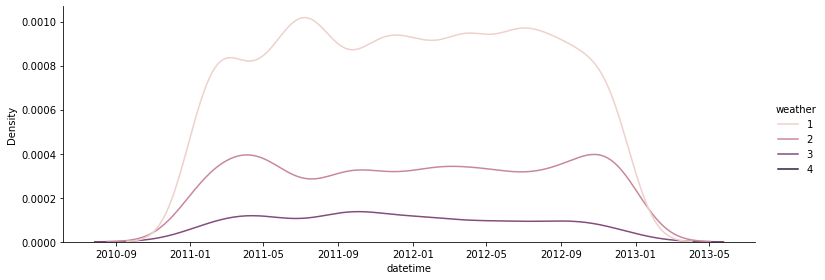

In [37]:
sns.displot(df, x='datetime', kind='kde', hue='weather',
            height=4, aspect=2.7)

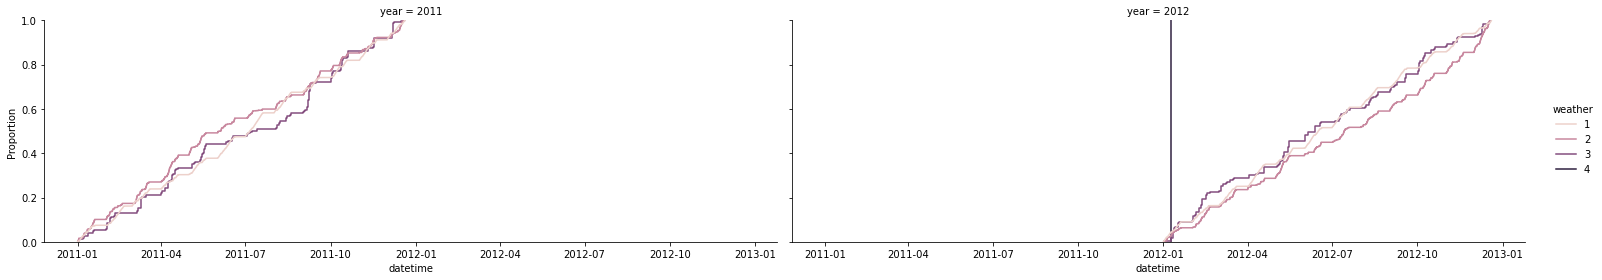

In [41]:
sns.displot(df, x='datetime', kind='ecdf', hue='weather', col='year',
            height=4, aspect=2.7)

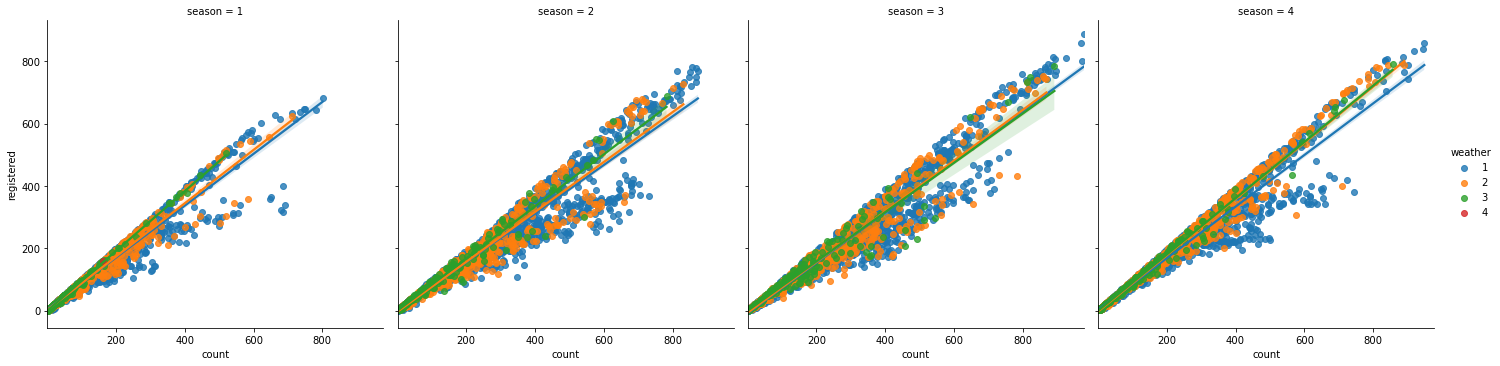

In [40]:
sns.lmplot(data=df, x="count", y="registered", col="season", hue="weather")